In [43]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
from datetime import datetime
from pandas_datareader import data as web

[Text(0, 0.5, 'Tesla Price'), Text(0.5, 0, 'Time')]

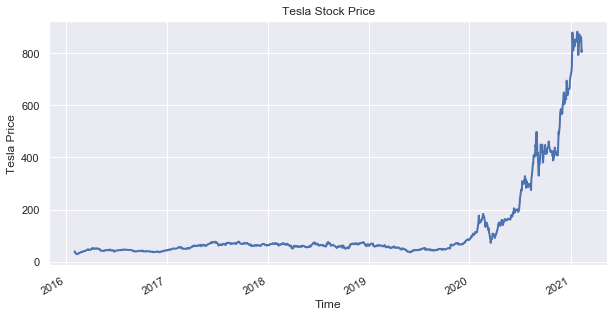

In [44]:
stockstartdate = '2016 - 02 -01 '
today = datetime.today().strftime('%Y-%m-%d')
df = web.DataReader('TSLA',data_source = 'yahoo', start = stockstartdate, end  = today)
df['Close'].plot(lw=2, figsize = (10,5), title = 'Tesla Stock Price').set(xlabel='Time',ylabel='Tesla Price')

In [45]:
df['SMA'] = df['Close'].rolling(window = 20).mean()

In [46]:
df['STD'] = df['Close'].rolling(window = 20).std()

In [47]:
df['Upper'] = df['SMA'] + (2*df['STD']) 
df['Lower'] = df['SMA'] - (2*df['STD'])

In [48]:
df = df[['Close','SMA','Upper','Lower']]

[Text(0, 0.5, 'Tesla Price'), Text(0.5, 0, 'Time')]

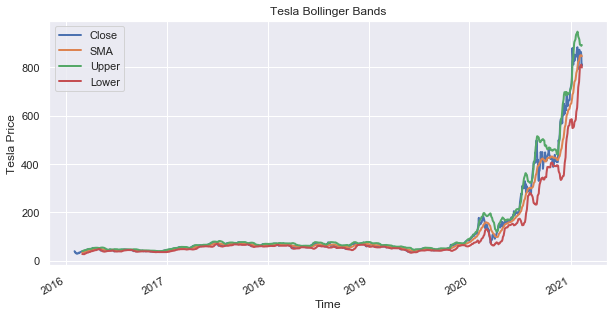

In [49]:
df.plot(lw=2, figsize = (10,5), title = 'Tesla Bollinger Bands').set(xlabel='Time',ylabel='Tesla Price')

In [50]:
def get_signal(data):
    buy_signal = []
    sell_signal = []
    
    for i in range(len(data['Close'])):
        if data['Close'][i] > data['Upper'][i]: # then sell 
            buy_signal.append(np.nan)
            sell_signal.append(data['Close'][i])
        elif data['Close'][i] < data['Lower'][i]: # then buy 
            buy_signal.append(data['Close'][i])
            sell_signal.append(np.nan)
        else: 
            buy_signal.append(np.nan)
            sell_signal.append(np.nan)
            
    return (buy_signal,sell_signal)

In [51]:
df['Buy'] = get_signal(df)[0]
df['Sell'] = get_signal(df)[1]

,Close,SMA,Upper,Lower,Buy,Sell
Date,,,,,,
2019-09-25,45.740002,46.825800,50.939333,42.712267,NaN,NaN
2019-09-26,48.512001,47.095500,50.879572,43.311428,NaN,NaN
2019-09-27,48.425999,47.299700,50.894161,43.705239,NaN,NaN
2019-09-30,48.174000,47.452300,50.914183,43.990418,NaN,NaN
2019-10-01,48.938000,47.649100,50.969079,44.329122,NaN,NaN
...,...,...,...,...,...,...
2021-02-05,852.229980,848.968497,893.361397,804.575596,NaN,NaN
2021-02-08,863.419983,848.138495,890.668573,805.608416,NaN,NaN
2021-02-09,849.460022,850.051996,888.863718,811.240273,NaN,NaN


In [58]:
df = df[19:]
df_copy = df.copy()
df = df[900:]

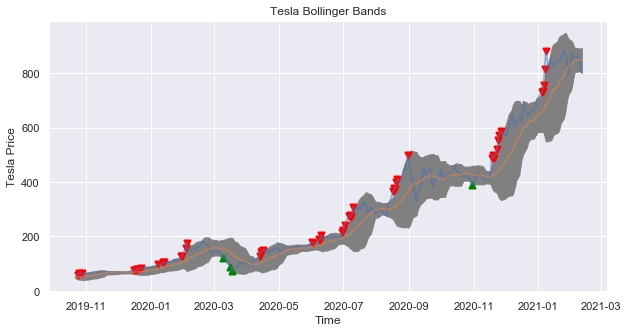

In [63]:
fig = plt.figure(figsize = (10,5))
ax = fig.add_subplot(1,1,1)
ax.fill_between(df.index, df['Upper'],df['Lower'],color='grey')
ax.plot(df.index, df[['Close', 'SMA']], lw=2, alpha = 0.5, label = 'Close')
ax.set_title('Tesla Bollinger Bands')
ax.set(xlabel='Time',ylabel='Tesla Price')
ax.scatter(df.index, df['Buy'], color = 'green', lw =2, label='Buy', marker='^', alpha = 1)
ax.scatter(df.index, df['Sell'], color = 'red', lw =2, label='Sell', marker='v', alpha = 1)